In [179]:
#-*- coding:utf-8 -*-
from tqdm import tqdm
import os
import pandas as pd
import numpy as np

path = os.path.abspath('')
csvPath = os.path.dirname(path)
CrawledPath = os.path.join(csvPath, 'CrawledData')
nameList = os.listdir(CrawledPath)
nameList.sort()
crawledFileName = nameList[-1]
crawledData = pd.read_csv(os.path.join(CrawledPath, crawledFileName), \
    dtype = {'종목코드':np.str, '종목명':np.str, \
    '현재가':np.int64, '시가총액':np.int64})

codes = crawledData['종목코드'].to_list()

logFile = open('Run_MakeAllModel.py.log', 'r')
lines = logFile.readlines()

max_loss = 0.0
max_val_loss = 0.0
min_loss = 1000000.0
min_val_loss = 1000000.0
sum_loss = 0.0
sum_val_loss = 0.0

sec_max_loss = 0.0
sec_max_val_loss = 0.0
sec_min_loss = 1000000.0
sec_min_val_loss = 1000000.0
sec_sum_loss = 0.0
sec_sum_val_loss = 0.0

checkLine = 'Epoch 100/100'
one_check = '.h5 Done'
sec_check = '_win50_sec10.h5 Done.'

losses = []
val_losses = []
sec_losses = []
sec_val_losses = []

testCodes = ['005930', '000660', '006400', '035420', '035720', '036570', '051900', '068270', '207940']

values = []
sec_values = []

index = 0
stock_num = 0
# 한줄 씩 읽어서
# Epoch 100/100이 나오면
# 다음에 나오는 h5 파일이 *.h5인지 *_win50_sec10.h5인지 검사
# loss와 val_loss 값을 맞는 쪽에 저장.
for line in tqdm(lines):
    if checkLine in line:
        line = lines[index + 1]
        # loss 값과 val_loss 값을 걸러냄
        splited = line.split('- loss: ')
        splited = splited[1].split(' - val_loss: ')
        loss = float(splited[0])
        val_loss = float(splited[1])
        
        for h5Line in lines[index + 2:]:
            if sec_check in h5Line:
                if h5Line.split(sec_check)[0] in codes:
                    sec_sum_loss += loss
                    sec_sum_val_loss += val_loss
                    
                    if h5Line.split(sec_check)[0] in testCodes:
                        sec_values.append((h5Line.split(sec_check)[0], loss, val_loss))
                    
                    # 최대, 최소값 갱신
                    if sec_max_loss < loss:
                        sec_max_loss = loss
                    elif sec_min_loss > loss:
                        sec_min_loss = loss
                    if sec_max_val_loss < val_loss:
                        sec_max_val_loss = val_loss
                    elif sec_min_val_loss > val_loss:
                        sec_min_val_loss = val_loss
                    
                    sec_losses.append(loss)
                    sec_val_losses.append(val_loss)
                lines.remove(h5Line)
                break

            elif one_check in h5Line:
                if h5Line.split(one_check)[0] in codes:
                    sum_loss += loss
                    sum_val_loss += val_loss
                    
                    if h5Line.split(one_check)[0] in testCodes:
                        values.append((h5Line.split(one_check)[0], loss, val_loss))
                    
                    # 최대, 최소값 갱신
                    if max_loss < loss:
                        max_loss = loss
                    elif min_loss > loss:
                        min_loss = loss
                    if max_val_loss < val_loss:
                        max_val_loss = val_loss
                    elif min_val_loss > val_loss:
                        min_val_loss = val_loss
                    
                    losses.append(loss)
                    val_losses.append(val_loss)

                    stock_num += 1
                lines.remove(h5Line)
                break
    index += 1

stock_num = float(stock_num)

sum_loss = round(sum_loss / stock_num, 6)
sum_val_loss = round(sum_val_loss / stock_num, 6)

sec_sum_loss = round(sec_sum_loss / stock_num, 6)
sec_sum_val_loss = round(sec_sum_val_loss / stock_num, 6)

100%|█████████▉| 588239/591066 [00:33<00:00, 17618.87it/s]


In [34]:
print(sum_loss, sum_val_loss, sec_sum_loss, sec_sum_val_loss)

(0.112789, 0.095482, 0.090937, 0.084211)


In [35]:
print(max_loss, min_loss, max_val_loss, min_val_loss)

(38.3407, 0.0, 20.9104, 0.0)


In [36]:
print(sec_max_loss, sec_min_loss, sec_max_val_loss, sec_min_val_loss)

(39.464, 0.0, 23.439, 0.0)


In [37]:
print(stock_num)

910.0


In [38]:
import matplotlib.pyplot as plt

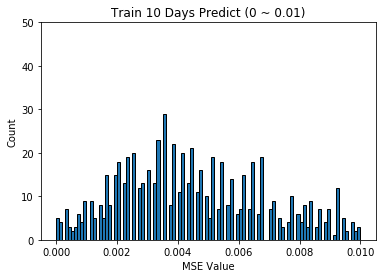

In [168]:
plt.figure(facecolor = 'white')
plt.hist(sec_losses, range = (0, 0.01), edgecolor = 'black', bins = 100)
plt.xlabel('MSE Value')
plt.ylabel('Count')
plt.ylim(top = 50)
plt.title('Train 10 Days Predict (0 ~ 0.01)')
plt.show()

In [169]:
count = 0
for myloss in sec_losses:
    if myloss <= 0.01:
        count += 1

In [170]:
print(count)

683


In [180]:
values

[('000660', 0.0037, 0.0045),
 ('005930', 0.0014, 0.0026),
 ('006400', 0.0042, 0.0105),
 ('035720', 0.0056, 0.0191),
 ('035420', 0.0012, 0.0015),
 ('036570', 0.0039, 0.003),
 ('051900', 0.0025, 0.0033),
 ('068270', 0.0041, 0.0023),
 ('207940', 0.0025, 0.0059)]

In [181]:
sec_values

[('000660', 0.0039, 0.0049),
 ('006400', 0.0048, 0.0074),
 ('035720', 0.0026, 0.002),
 ('035420', 0.0019, 0.0055),
 ('036570', 0.0062, 0.009),
 ('051900', 0.004, 0.0055),
 ('068270', 0.0055, 0.0065),
 ('207940', 0.0057, 0.0065)]